In [7]:
import bayesnf as bnf
import pandas as pd
import jax
import time
import os, sys
sys.path.insert(0, "../modules")
import evaluate as ev
import numpy as np
import utility as ut

ds = "L96"
root = f"../data/{ds}"
df_train = pd.read_csv(f"{root}/train.csv")
feature_cols = df_train.columns[:-1].to_list()
target_col = df_train.columns[-1]
n = len(feature_cols)
interactions = [(i, j) for i in range(n) for j in range(n) if i < j]
print(len(interactions))

bnf_kwargs = {"width": 256,
  "depth": 2,
  "freq": None,
  "seasonality_periods": None,
  "num_seasonal_harmonics": None,
  "feature_cols": feature_cols,
  "target_col": target_col,
  "observation_model": 'NORMAL',
  "timetype": 'float',
  "standardize":  None,
  "interactions": interactions}

model = bnf.BayesianNeuralFieldMAP(**bnf_kwargs)

start = time.time()
model.fit(df_train.iloc[:, :], seed=jax.random.PRNGKey(0), num_epochs=1,)
print(f"Time Taken = {time.time()-start:.3f}")

train, test = ev.get_data(f"{root}/train.npy", sep=int(1e5))
prediction = ev.evaluate(model, root, 10)
print(np.sqrt(((test[:, :10] - prediction)**2).sum(axis=0).mean()))

ut.save(model, os.path.abspath(f"{root}/model"), step=1)

45
Time Taken = 165.549
30.190890853770135


In [9]:
new_model = ut.load(os.path.abspath(f"{root}/model"), df_train, **bnf_kwargs)
train, test = ev.get_data(f"{root}/train.npy", sep=int(1e5))
prediction = ev.evaluate(new_model, root, 10)
print(np.sqrt(((test[:, :10] - prediction)**2).sum(axis=0).mean()))

Time taken by load is 2.0222 seconds
30.190890853770135


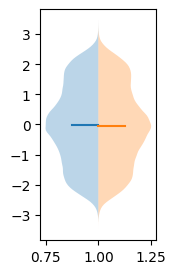

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(1.5, 3))
vp_left = ax.violinplot(df_test.loc[:, feature_cols[1:]].to_numpy().flatten(), showextrema=False, showmeans=True, side="low")
vp_right = ax.violinplot(df_train.loc[:50000, feature_cols[1:]].to_numpy().flatten(), showextrema=False, showmeans=True, side="high")

In [10]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [35]:
def func(m):
    z = m.params_.zero_initial_log_noise_scale.shape
    print(hasattr(m.params_, "zero_initial_log_noise_scale"))
    print(m.params_._replace(**{"zero_initial_log_noise_scale":np.zeros(z)}))
func(model)

True
StructTuple(
  zero_initial_log_noise_scale=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
  zero_initial_mean_for_bias_or_transformed_scale_1=array([[-0.00499997, -0.00499997, -0.00499997, -0.00499997, -0.00499997,
            -0.00499997, -0.00499997, -0.00499997, -0.00499997, -0.00499997,
            -0.00499997, -0.00499997, -0.00499997, -0.00499997, -0.00499997,
            -0.00499997]], dtype=float32),
  zero_initial_mean_for_bias_or_transformed_scale_2=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
          dtype=float32),
  zero_initial_mean_for_bias_or_transformed_scale_3=array([[[nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            ...,
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan],
            [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32),
  initial_weight_matrix_4

In [10]:
model.params_.zero_initial_log_noise_scale

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]], dtype=float32)

In [6]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [5]:
!pip install tensorflow

/Users/pman0581/miniconda3/envs/bnf/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 MB 5.5 MB/s eta 0:00:0000:0100:02
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 5.7 MB/s eta 0:00:00a 0:00:01
